**Name : Adeniyi Adeleke**

**MEGR 8090_Introduction to Machine Learning**

**MiniProject 2**

In [1]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

In [2]:
#Data directory depends on where the file is stored
df = pd.read_excel(r'C:/Users/kyade/Downloads/Concrete_Data.xls')

In [3]:
#Getting dataset from shared google drive and using Google colab
#from google.colab import drive
#drive.mount('/content/gdrive/', force_remount = True)

#df = pd.read_excel(r'/content/gdrive/MyDrive/Adeniyi Adeleke/MiniProject_2/Concrete_Data.xls')

Cleaning the Data

In [4]:
#Exploratory Data Analysis
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [12]:
#df.info()

In [13]:
df.shape

(1030, 9)

<AxesSubplot:>

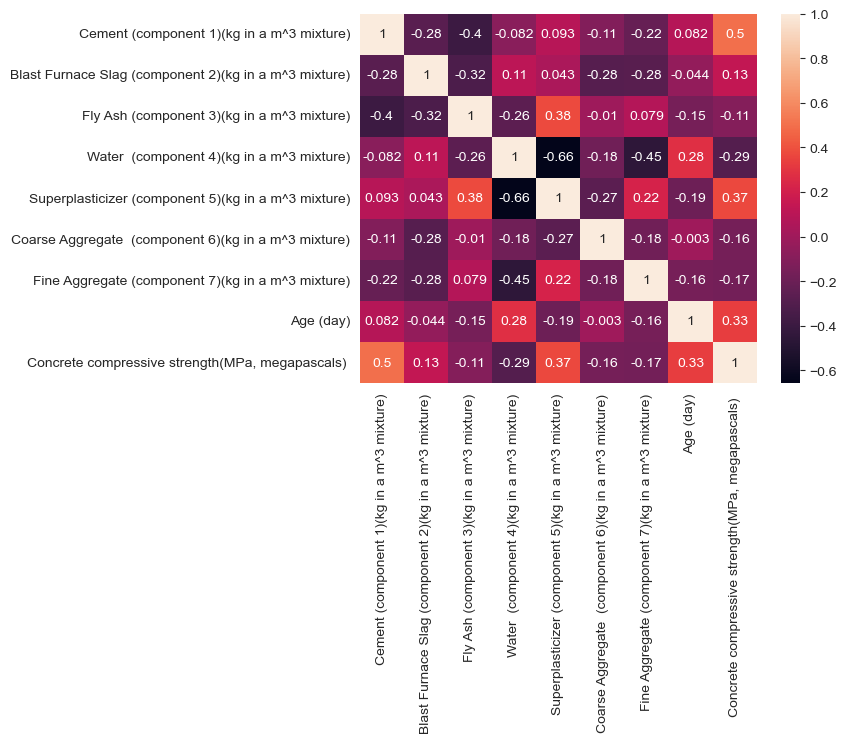

In [14]:
# correlation coefficient check
correlations = df.corr()
sns.heatmap(correlations, annot=True)

The data showed little or no correlation to the output variable so linear regression is not ideal in developing a model

In [15]:
# Check for missing values
missing_val = df.isnull().sum()
missing_val

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

***No missing value exist in the dataset***

# Data Normalization and Splitting

In [16]:
# Libraries from Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
# Defining the features and target variable
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 30)

print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape))

The dimension of x_train is (824, 8)
The dimension of x_test is (206, 8)


In [17]:
# Normalization using Z-Score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns = x_test.columns)

In [18]:
x_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,-1.333855,-0.846483,1.955768,0.924642,0.263614,-1.967479,1.227620,-0.286220
1,2.354867,-0.846483,-0.850068,0.338259,-1.050183,1.961578,-2.017679,3.669598
2,-0.897156,-0.846483,1.113233,-0.695531,0.613959,1.361124,0.341731,-0.515069
3,-1.330940,1.180794,-0.850068,0.010438,-0.477503,0.144552,0.568915,-0.286220
4,0.382236,0.903600,-0.850068,0.199743,0.297301,-0.309704,-0.799264,-0.286220


# Linear Regression Models

In [20]:
#ln = LinearRegression()
#ln.fit(x_train, y_train) #linear regression
#test_pred = ln.predict(x_test)  #prediction
#r2 = r2_score(y_test, test_pred)
#r2
#mae = mean_absolute_error(y_test, test_pred)
#mae

In [21]:
#coeff_df = pd.DataFrame()
#coeff_df['Column_Name'] = x_train.columns
#coeff_df['Coefficient_Value'] = pd.Series(ln.coef_)
#print(coeff_df.head(8))
#plt.rcParams['figure.figsize']=(15,6)
#plt.xticks(rotation=85)
#plt.bar(coeff_df['Column_Name'],coeff_df['Coefficient_Value'])

# Lasso and Ridge Regression

## Lasso Regression

When Alpha = 0.001
The R-squared value is  0.5445
The MAE is 8.9959

======================= regularization============================
                                         Column_Name  Coefficient_Value
0          Cement (component 1)(kg in a m^3 mixture)          11.544896
1  Blast Furnace Slag (component 2)(kg in a m^3 m...           8.169960
2         Fly Ash (component 3)(kg in a m^3 mixture)           5.019126
3          Water  (component 4)(kg in a m^3 mixture)          -3.379837
4  Superplasticizer (component 5)(kg in a m^3 mix...           2.135307
5  Coarse Aggregate  (component 6)(kg in a m^3 mi...           0.492895
6  Fine Aggregate (component 7)(kg in a m^3 mixture)           0.714808
7                                          Age (day)           7.711825
**************************************************************************
When Alpha = 0.01
The R-squared value is  0.5439
The MAE is 9.0055

======================= regularization============================
      

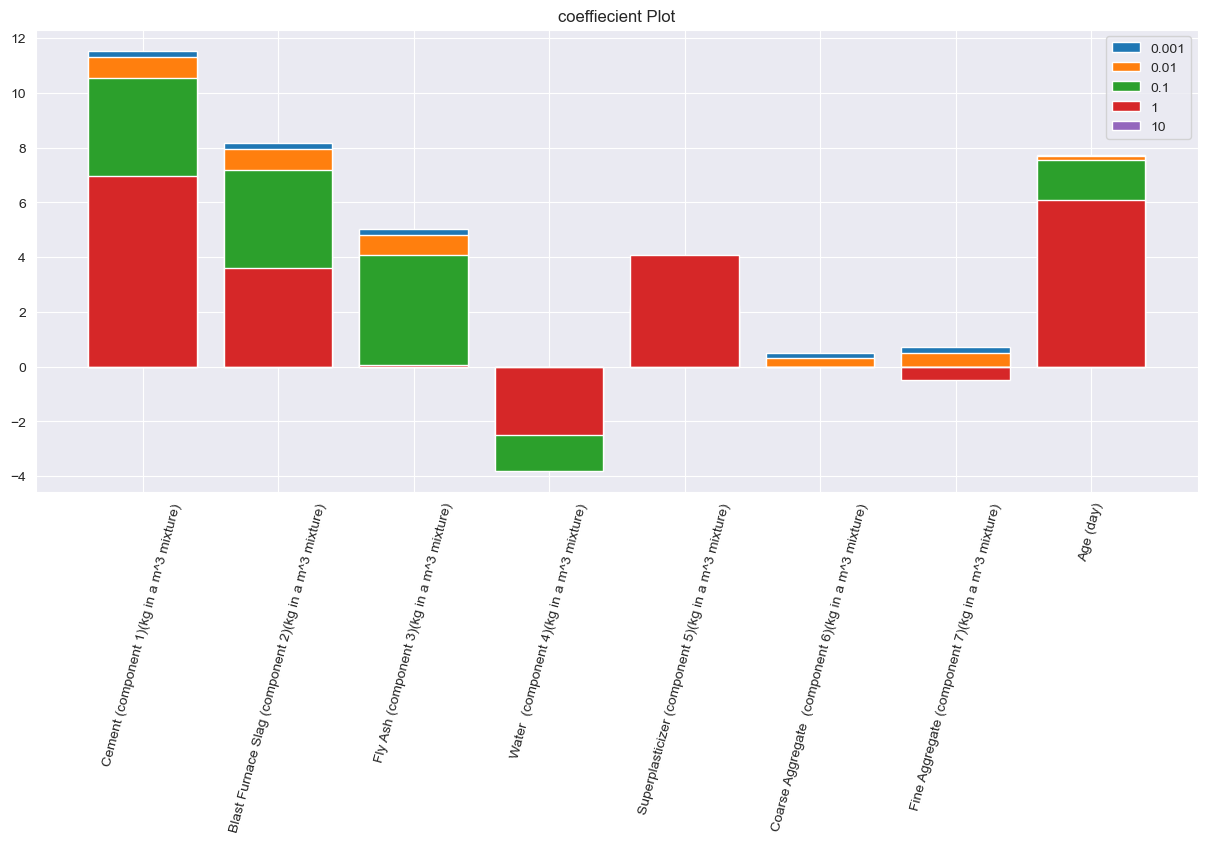

In [26]:
# looping through each alpha value and train a Lasso regression model
alpha_values = [0.001, 0.01, 0.1, 1,10]
for alpha in alpha_values:
  lasso_model = Lasso(alpha=alpha)
  lasso_model.fit(x_train, y_train)
  y_pred_lasso = lasso_model.predict(x_test)

  # Calculate R-squared and MAE
  r_sq = r2_score(y_test,y_pred_lasso)
  mae = mean_absolute_error(y_test, y_pred_lasso)

  # print results for each value
  print(f"When Alpha = {alpha}")
  print (f"The R-squared value is {r_sq: .4f}")
  print(f"The MAE is {mae:.4f}")
  print("\n======================= regularization============================")

  # print the coefficients of the ridge model
  coeff_df = pd.DataFrame()
  coeff_df['Column_Name'] = x_train.columns
  coeff_df['Coefficient_Value'] = pd.Series(lasso_model.coef_)
  print(coeff_df.head(8))
  print("**************************************************************************")

  # plotting the coefficients
  plt.xticks(rotation=75)
  plt.rcParams['figure.figsize']=(15,6)
  plt.bar(coeff_df['Column_Name'],coeff_df['Coefficient_Value'])
  plt.title("coeffiecient Plot")
  plt.legend(alpha_values)

***Note: In Lasso regression, the coefficients values when penalty parameter is 10 were all zero***

# Ridge Regression

When Alpha = 0.001
The R-squared value is  0.5446
The MAE is 8.9949

=======================Ridge regularization============================
                                         Column Name  Coefficient Value
0          Cement (component 1)(kg in a m^3 mixture)          11.570258
1  Blast Furnace Slag (component 2)(kg in a m^3 m...           8.195216
2         Fly Ash (component 3)(kg in a m^3 mixture)           5.041064
3          Water  (component 4)(kg in a m^3 mixture)          -3.360459
4  Superplasticizer (component 5)(kg in a m^3 mix...           2.137109
5  Coarse Aggregate  (component 6)(kg in a m^3 mi...           0.512309
6  Fine Aggregate (component 7)(kg in a m^3 mixture)           0.738436
7                                          Age (day)           7.713975
***********************************************************************
When Alpha = 0.01
The R-squared value is  0.5446
The MAE is 8.9950

=======================Ridge regularization============================

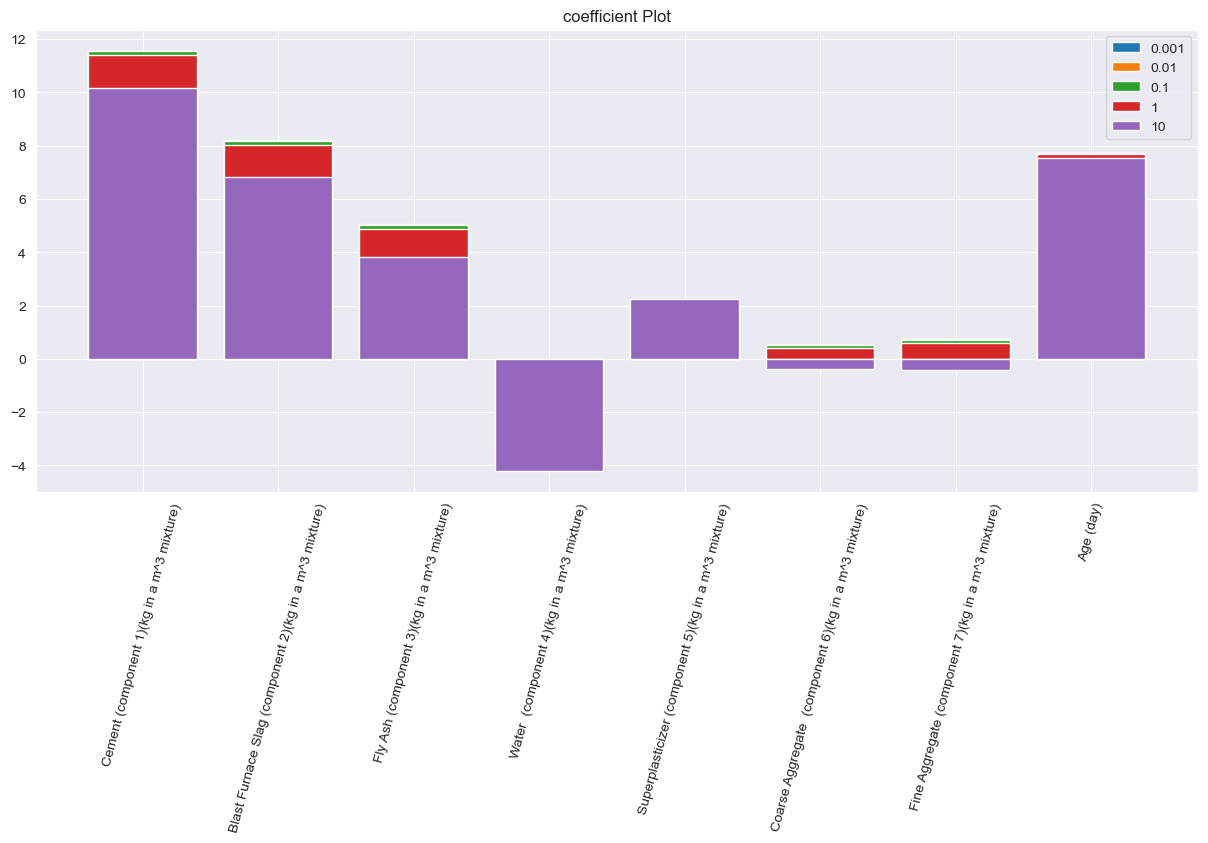

In [23]:
# looping through each alpha value and train a Ridge regression model
alpha_value = [0.001, 0.01, 0.1, 1, 10]
for alpha in alpha_value:
  ridge_model = Ridge(alpha=alpha)
  ridge_model.fit(x_train, y_train)
  y_pred_ridge = ridge_model.predict(x_test)

  # Calculate R-squared and MAE
  r_sq2 = r2_score(y_test,y_pred_ridge)
  mae2 = mean_absolute_error(y_test, y_pred_ridge)

  # print results for each value
  print(f"When Alpha = {alpha}")
  print (f"The R-squared value is {r_sq2: .4f}")
  print(f"The MAE is {mae2:.4f}")
  print("\n=======================Ridge regularization============================")

  # print the coefficients of the ridge model
  coeff_df2 = pd.DataFrame()
  coeff_df2['Column Name'] = x_train.columns
  coeff_df2['Coefficient Value'] = pd.Series(ridge_model.coef_)
  print(coeff_df2.head(8))
  print("***********************************************************************")
  
  # plotting the coefficients
  plt.xticks(rotation=75)
  plt.rcParams['figure.figsize']=(15,6)
  plt.bar(coeff_df2['Column Name'],coeff_df2['Coefficient Value'])  
  plt.title("coefficient Plot")
  plt.legend(alpha_value)

***Note: The coefficient is showing purple because it is a stacked bar plot, meaning the other coefficients of 0.001-1 are already in the plot***

# Effect of penalty parameters on feature selection

**For Lasso regression**, the alpha values (penalty parameters determine the level of shrinkage). Whne the alpha value is large (for example when alpha = 10), the regularization penalty is strong, causing, more features coefficients to shrink towards zero or become zero. Also, it was noticed that when alpha value is small (for example, when alpha is 0.01), the regularization penalty is weak causing more features to retain non-zero coefficients, resulting in a less sparse solution and including more features

**In Ridge regression**, the alpha values do not have a direct influence on feature selection and as such, does not set any coefficients to exactly zero as the L2 penalty does not have effect on feature selection. However, as the alpha value increased, it resulted in greater shrinkage of coefficients, leading to a model that is less likely to overfit the training data.

# Lasso Regression

## ***Advantages***

1.   Lasso regression helps to perform feature selection of irrelevant to zero. This can be useful in high dimensional data where only few features might be important in predicting the target variable.
2. It can handle multicollinearity by selecting one of the correlated features and setting the coefficients of the others to zero.
3. It helps to reduce model complexity.

## ***Disavantages***

1. It is biased towards smaller coefficients and can understimate the true values in some cases.
2. It requires selecting the regularization parameter that controls the level of shrinkage, which can be difficult.





# Ridge Regression

## ***Advantages***
 
1.   It does not perform feature selection and includes all the features in the model, making it useful when all the features are relevant.
2.   It is less affected by noise thus making it more stable than ordinary least square regression.
3. It helps to reduce model variance.

## ***Disadvantages***

1.  It is impossible to set coefficients to zero, which can be a negative impact where feature selection is important.
2.  It is sensitive to large outliers and may not perform well in the presence of extreme values.




# Benefits of Ridge and Lasso Regression over OLS Linear regression
1. It handles multicollinearity, a situation where feattures in a regression model are highly correlated with each other. OLS L=linear Linear regression assumes that features are not correlated which can lead to unstable and unreliable estimeates of regression coefficient.
2. It helps to reduce overfitting in data
3. It leads to improved prediction accuracy bu introducing bias in the estimated coefficients in exchange for lower variance.
4. It helps to constrain the size of the coefficients in the regression model (Regularization).

# Thresholding

In [24]:
# Fit a ridge regression model with an alpha value of 1.0
ridge_model1 = Ridge(alpha=1)
ridge_model1.fit(x_train, y_train)
y_pred_ridge = ridge_model1.predict(x_test)

#Defining thresholds
thresholds = [1e-5, 1e-3, 0.1]

#looping through each threshold and printing insignificant features
for threshold in thresholds:
  insignificant_features = []
  for i, coef in enumerate(ridge_model1.coef_):
    if abs(coef) < threshold:
      insignificant_features.append(i)
  print(f"Threshold: {threshold}")
  print(f"Insignifcant features: {insignificant_features}")

Threshold: 1e-05
Insignifcant features: []
Threshold: 0.001
Insignifcant features: []
Threshold: 0.1
Insignifcant features: []


***Answer: For the the penalty parameter selected, None of the features are insignificant when we used three different threshold values for a ridge regression model***

#5-fold Cross-Validation

In [25]:
#LassoCV model with 5-fold cross-validation
model = LassoCV(alphas = [0.001, 0.01, 0.1, 1, 10], cv=5)
model.fit(x_train, y_train)

#Print the optimal penalty parameter
print("Optimal alpha:", model.alpha_)
#print("Rsquared score:", model.score(x_train,y_train))


Optimal alpha: 0.1


***The optimal penalty parameter for the predictive model is 0.1***